/opt/anaconda3/envs/thesis/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


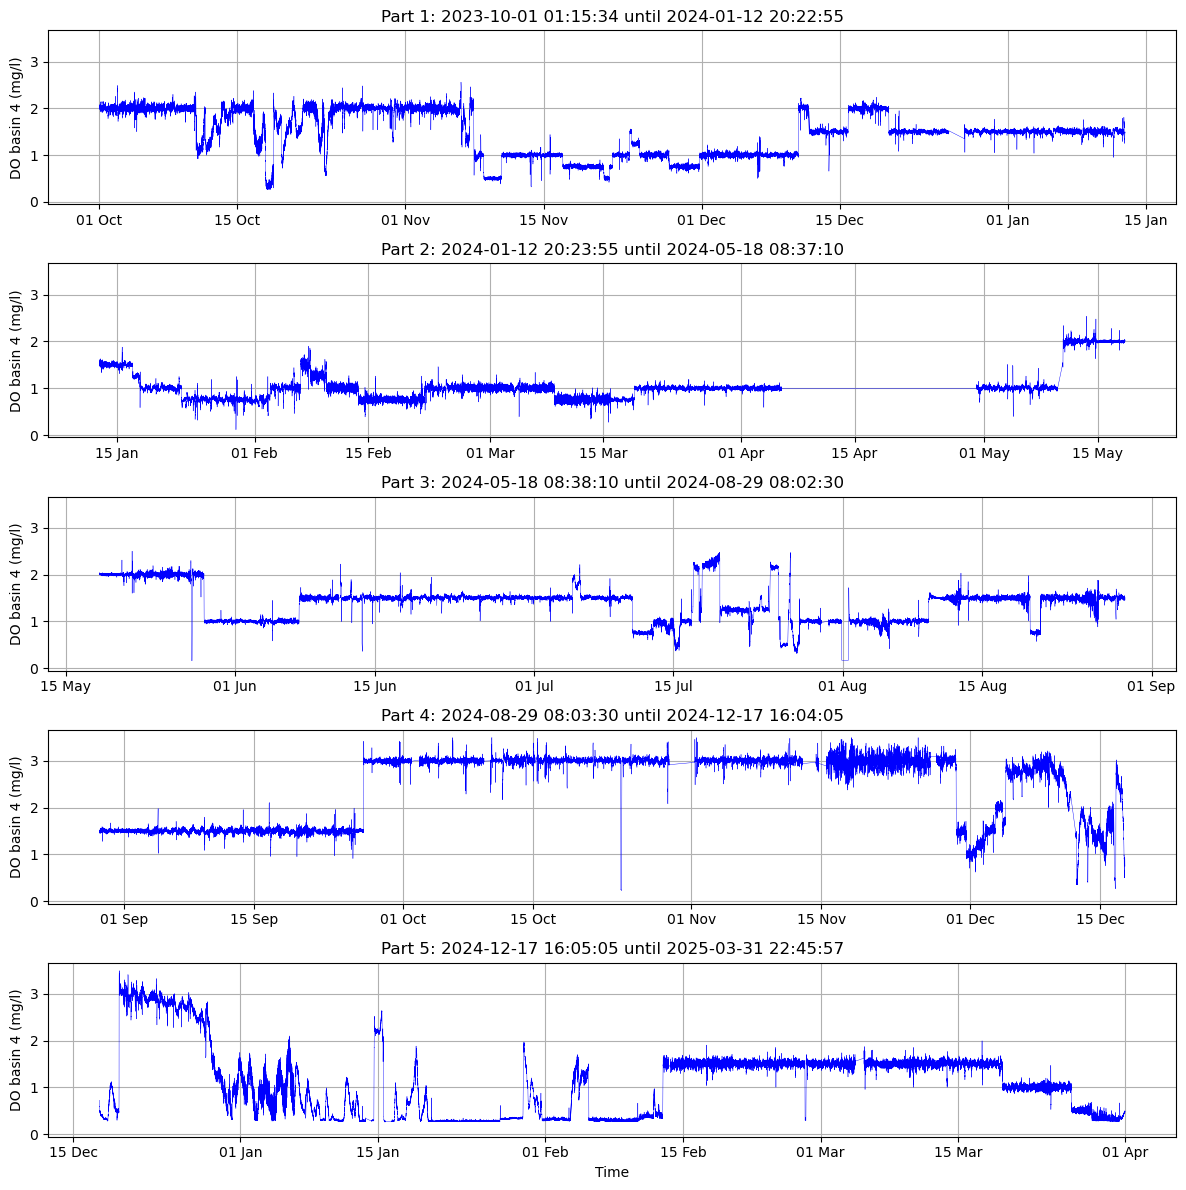

In [1]:
from scipy.stats import trim_mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Laad CSV-bestand
DO_basin4 = pd.read_csv("DO_basin4.csv")

# Controleer of 'Time' kolom datetime is, anders omzetten
if not pd.api.types.is_datetime64_any_dtype(DO_basin4['Time']):
    DO_basin4['Time'] = pd.to_datetime(DO_basin4['Time'])

# 0-waarden
DO_basin4 = DO_basin4.dropna()
DO_basin4 = DO_basin4[DO_basin4['DO_basin4'] != 0]
DO_basin4 = DO_basin4[DO_basin4['DO_basin4'] < 3.5]
DO_basin4 = DO_basin4[~((DO_basin4["Time"] >= "2024-04-06") & (DO_basin4["Time"] <= "2024-04-30"))]

rolling_median = DO_basin4['DO_basin4'].rolling(window=150, center=True).median()
diff = np.abs(DO_basin4['DO_basin4'] - rolling_median)
threshold = 0.5
DO_basin4 = DO_basin4[diff < threshold]

n = 5
DO_basin4_splits = np.array_split(DO_basin4, n)

# Subplots aanmaken
fig, axes = plt.subplots(n, 1, figsize=(12, 12), sharey=True)

for i, ax in enumerate(axes):
    deel = DO_basin4_splits[i]
    ax.plot(deel["Time"], deel["DO_basin4"], color="b", linewidth=0.3)
    ax.set_title(f"Part {i+1}: {deel['Time'].min()} until {deel['Time'].max()}")
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
    ax.grid()
    if i == n - 1:
        ax.set_xlabel("Time")
    ax.set_ylabel("DO basin 4 (mg/l)")

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# Werk met een kopie om veilig te zijn
dfDO4 = DO_basin4.copy()

# 3. Zet tijd als index en sorteer
df = dfDO4.set_index("Time").sort_index()

# 4. Maak tijdraster op exact 10-minutenintervallen
start = df.index.min().floor("10min")
end = df.index.max().ceil("10min")
time_grid = pd.date_range(start=start, end=end, freq="10min")

# 5. Nieuwe dataframe met enkel de grid
df_grid = pd.DataFrame(index=time_grid)

# 6. Voeg originele data toe en interpoleer
df_full = pd.concat([df, df_grid], axis=0).sort_index()
df_interp = df_full.interpolate(method="time")

# 7. Selecteer enkel waarden exact op 10-minuten
df_final = df_interp.loc[time_grid].reset_index().rename(columns={"index": "Time"})

# Zorg dat 'Time' kolom datetime is (zou het al moeten zijn na voorgaande code)
df_final["Time"] = pd.to_datetime(df_final["Time"])

# Filter enkel waarden vanaf (inclusief) 25 oktober 2023
df_filtered = df_final[df_final["Time"] >= pd.Timestamp("2023-10-25")]
df_filtered = df_filtered.rename(columns={"Time": "Datetime"})

# (Optioneel) Opslaan
df_filtered.to_csv("DObasin4_interpolated.csv", index=False)

print(df_filtered.head(10))

                Datetime  DO_basin4
3449 2023-10-25 00:00:00   2.028667
3450 2023-10-25 00:10:00   2.024333
3451 2023-10-25 00:20:00   1.943000
3452 2023-10-25 00:30:00   1.961333
3453 2023-10-25 00:40:00   1.953000
3454 2023-10-25 00:50:00   2.021333
3455 2023-10-25 01:00:00   1.975667
3456 2023-10-25 01:10:00   2.017333
3457 2023-10-25 01:20:00   1.984667
3458 2023-10-25 01:30:00   2.007333


/opt/anaconda3/envs/thesis/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


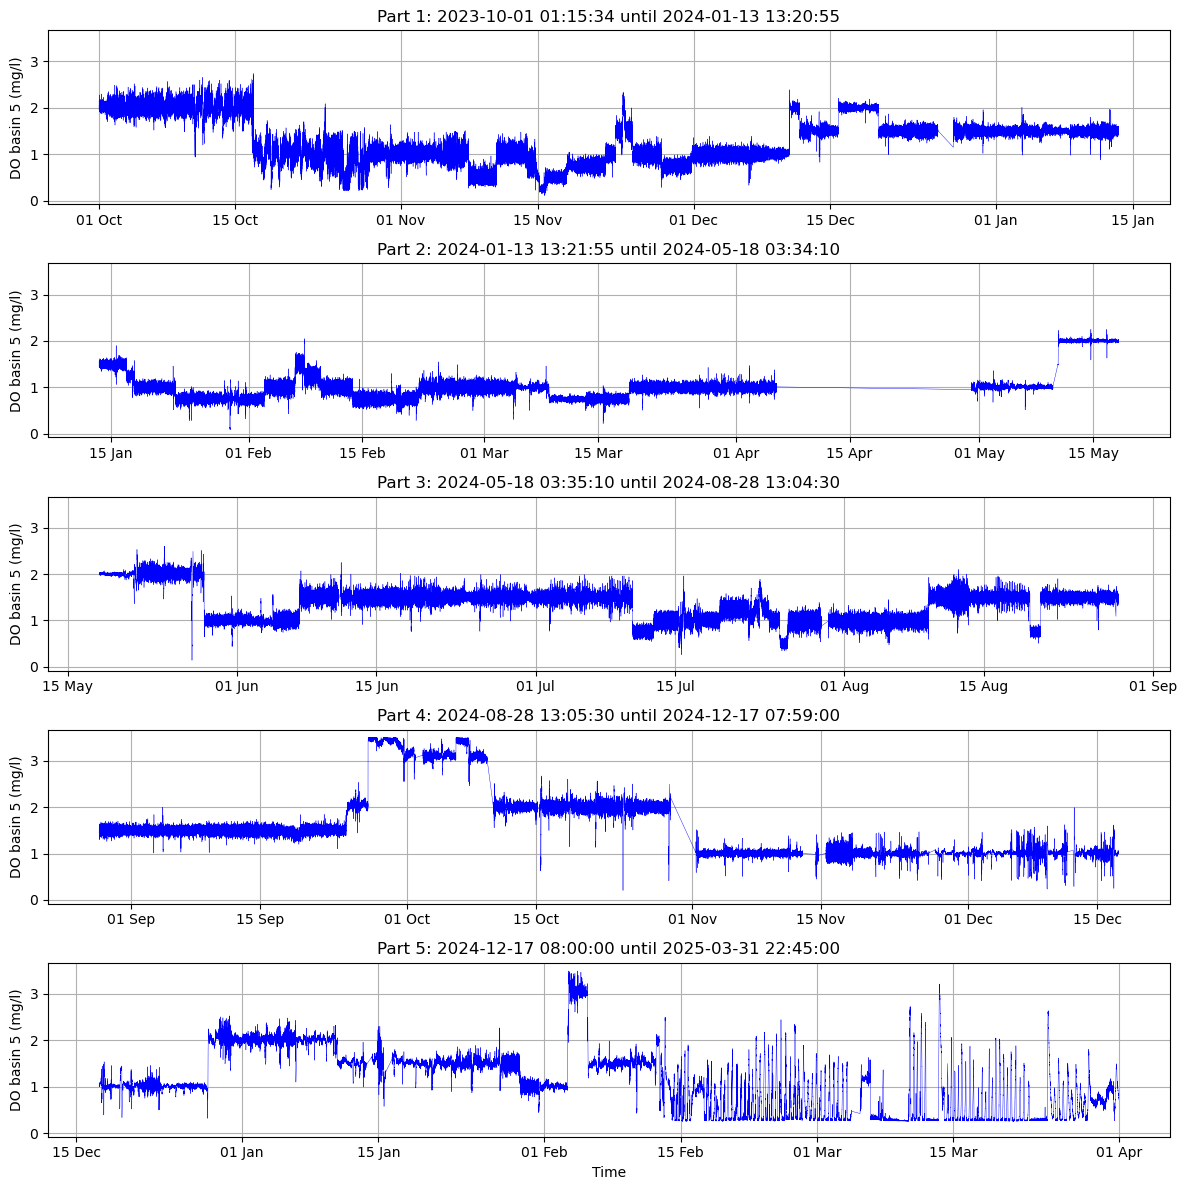

In [3]:
from scipy.stats import trim_mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Laad CSV-bestand
DO_basin5 = pd.read_csv("DO_basin5.csv")

# Controleer of 'Time' kolom datetime is, anders omzetten
if not pd.api.types.is_datetime64_any_dtype(DO_basin5['Time']):
    DO_basin5['Time'] = pd.to_datetime(DO_basin5['Time'])

# 0-waarden
DO_basin5 = DO_basin5.dropna()
DO_basin5 = DO_basin5[DO_basin5['DO_basin5'] != 0]
DO_basin5 = DO_basin5[DO_basin5['DO_basin5'] < 3.5]
DO_basin5 = DO_basin5[~((DO_basin5["Time"] >= "2024-04-06") & (DO_basin5["Time"] <= "2024-04-30"))]

rolling_median = DO_basin5['DO_basin5'].rolling(window=150, center=True).median()
diff = np.abs(DO_basin5['DO_basin5'] - rolling_median)
threshold = 0.5
DO_basin5 = DO_basin5[diff < threshold]


n = 5
DO_basin5_splits = np.array_split(DO_basin5, n)

# Subplots aanmaken
fig, axes = plt.subplots(n, 1, figsize=(12, 12), sharey=True)

for i, ax in enumerate(axes):
    deel = DO_basin5_splits[i]
    ax.plot(deel["Time"], deel["DO_basin5"], color="b", linewidth=0.3)
    ax.set_title(f"Part {i+1}: {deel['Time'].min()} until {deel['Time'].max()}")
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
    ax.grid()
    if i == n - 1:
        ax.set_xlabel("Time")
    ax.set_ylabel("DO basin 5 (mg/l)")

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

# Werk met een kopie om veilig te zijn
dfDO5 = DO_basin5.copy()

# 3. Zet tijd als index en sorteer
df = dfDO5.set_index("Time").sort_index()

# 4. Maak tijdraster op exact 10-minutenintervallen
start = df.index.min().floor("10min")
end = df.index.max().ceil("10min")
time_grid = pd.date_range(start=start, end=end, freq="10min")

# 5. Nieuwe dataframe met enkel de grid
df_grid = pd.DataFrame(index=time_grid)

# 6. Voeg originele data toe en interpoleer
df_full = pd.concat([df, df_grid], axis=0).sort_index()
df_interp = df_full.interpolate(method="time")

# 7. Selecteer enkel waarden exact op 10-minuten
df_final = df_interp.loc[time_grid].reset_index().rename(columns={"index": "Time"})

# Zorg dat 'Time' kolom datetime is (zou het al moeten zijn na voorgaande code)
df_final["Time"] = pd.to_datetime(df_final["Time"])

# Filter enkel waarden vanaf (inclusief) 25 oktober 2023
df_filtered = df_final[df_final["Time"] >= pd.Timestamp("2023-10-25")]
df_filtered = df_filtered.rename(columns={"Time": "Datetime"})

# (Optioneel) Opslaan
df_filtered.to_csv("DObasin5_interpolated.csv", index=False)

print(df_filtered.head(10))

                Datetime  DO_basin5
3449 2023-10-25 00:00:00   1.380556
3450 2023-10-25 00:10:00   0.806067
3451 2023-10-25 00:20:00   0.912000
3452 2023-10-25 00:30:00   1.075156
3453 2023-10-25 00:40:00   0.658067
3454 2023-10-25 00:50:00   0.684567
3455 2023-10-25 01:00:00   0.892967
3456 2023-10-25 01:10:00   1.083667
3457 2023-10-25 01:20:00   0.980800
3458 2023-10-25 01:30:00   0.789967


/opt/anaconda3/envs/thesis/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


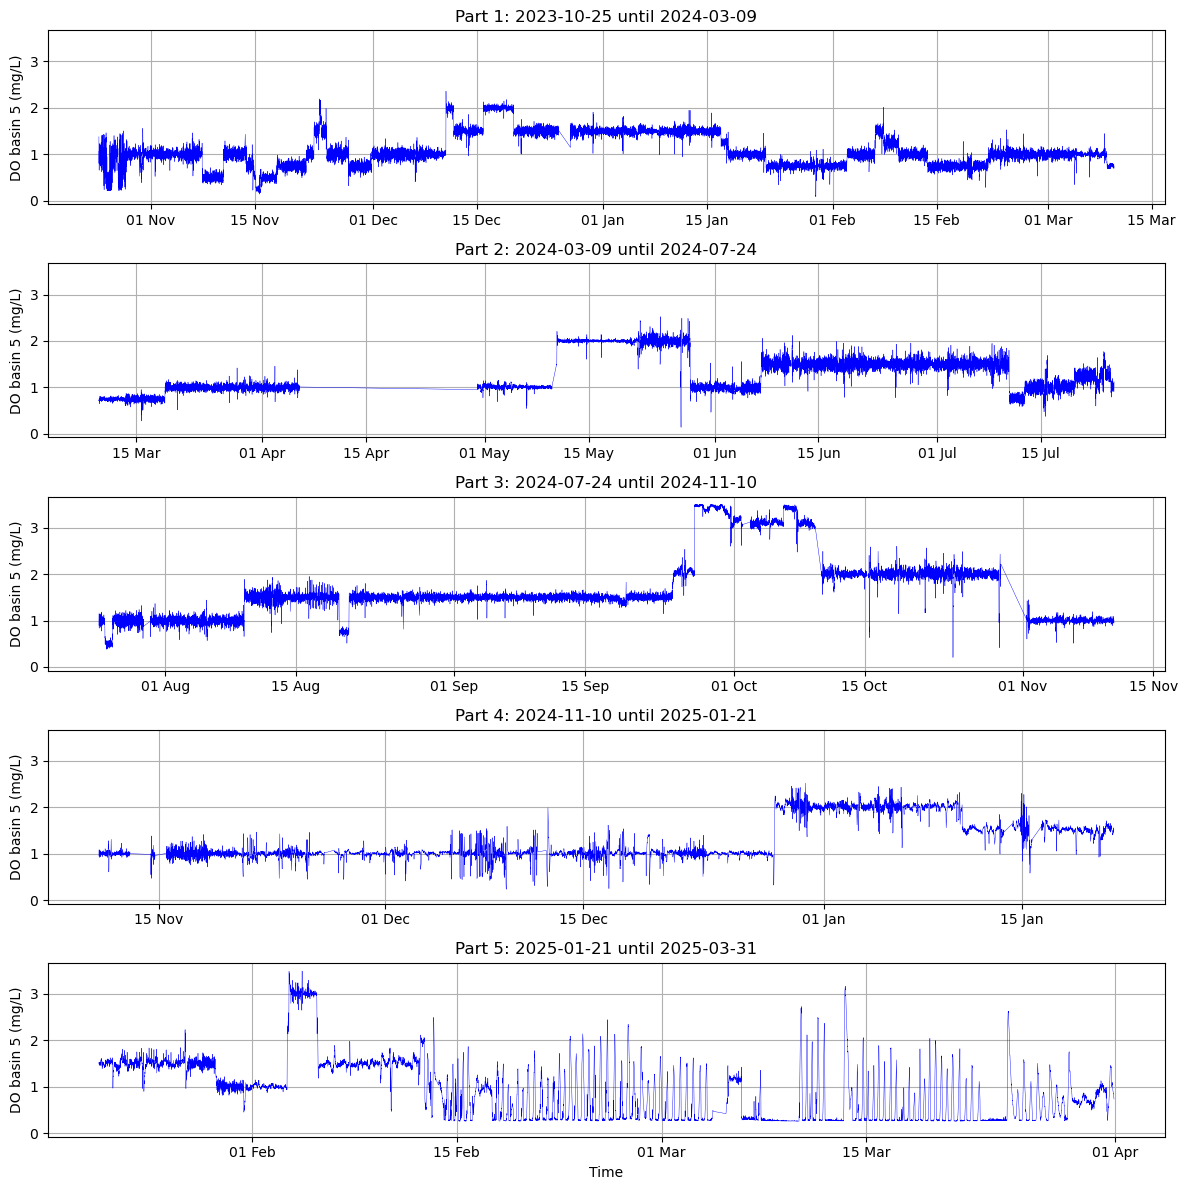

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV-bestand inlezen
df = pd.read_csv("DObasin5_interpolated.csv")

# Zorg dat de 'Datetime'-kolom datetime-type is
df["Datetime"] = pd.to_datetime(df["Datetime"])

# Aantal delen voor de subplot
n = 5
DO_basin5_splits = np.array_split(df, n)

# Subplots aanmaken
fig, axes = plt.subplots(n, 1, figsize=(12, 12), sharey=True)

for i, ax in enumerate(axes):
    deel = DO_basin5_splits[i]
    ax.plot(deel["Datetime"], deel["DO_basin5"], color="b", linewidth=0.3)
    ax.set_title(f"Part {i+1}: {deel['Datetime'].min().date()} until {deel['Datetime'].max().date()}")
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
    ax.grid()
    if i == n - 1:
        ax.set_xlabel("Time")
    ax.set_ylabel("DO basin 5 (mg/L)")

plt.tight_layout()
plt.show()